# Final Project 3 - Ensemble and Random Forest

Created-by: Kelompok 9  
Class: PYTN-KS18
  
  
Member 1 : Vincent Tanaka - PYTN-KS18-013  
Member 2 : Audris Vondrea Wirduno - PYTN-KS18-02

## a. Introduction

### a.1 Background
Dalam proyek ini, Kelompok 9 akan bekerja dengan *dataset* https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data *"Heart Failure Clinical Data*" yang tersedia di *Kaggle*. *Dataset* ini merupakan kumpulan *data* yang mengandung fitur klinis penting yang dapat digunakan untuk memprediksi kematian akibat gagal jantung. Kegagalan jantung merupakan salah satu penyebab utama kematian di seluruh dunia, sehingga memahami faktor-faktor yang berkontribusi terhadapnya adalah penting untuk intervensi medis yang lebih efektif.

### a.2 About Dataset

Dataset ini terdiri dari **13** fitur yang mencakup :  
**1. age** - umur pasien  
**2. anaemia** - apakah ada pengurangan haemoglobin  
**3. creatinine_phosphokinase** - level enzim CPK dalam mcg/L  
**4. diabetes** - apakah pasien punya riwayat diabetes  
**5. ejection_fraction** - persentase darah yang meninggalkan jantung dalam persentasi di setiap kontraksi jantung  
**6. high_blood_pressure** - apakah pasien punya darah tinggi  
**7. platelets** - jumlah platelet di darah dalam kiloplatelets/mL  
**8. serum_creatinine** - level serum creatinine di darah dalam mg/dL  
**9. serum_sodium** - level serum sodium di darah dalam mEq/L  
**10. sex** - apakah pasien pria atau wanita  
**11. smoking** - apakah pasien merokok  
**12. time** - waktu dalam hari untuk follow-up  
**13. DEATH_EVENT** - apakah pasien sudah meninggal saat waktu follow-up  

### a.3 Project Objectives

 Tujuan utama dari analisis ini adalah
 - Untuk membangun model prediktif yang dapat mengidentifikasi pasien yang berisiko tinggi terkena gagal jantung, sehingga memungkinkan intervensi dini dan perawatan yang lebih baik.
 - Mengevaluasi model Ensemble dan Random Foest yang dibuat dalam memprediksi gagal jantung pada *dataset*.

Analisis ini tidak hanya akan memberikan wawasan tentang faktor-faktor yang mempengaruhi gagal jantung, tetapi juga akan membantu dalam pengembangan model pembelajaran mesin yang dapat digunakan oleh profesional kesehatan untuk memperbaiki hasil bagi pasien dengan risiko gagal jantung.

## b. *Import Libraries*

In [1]:
# Import the needed datasets
import pandas as pd
import numpy as np
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

## c. *Dataset Loading*

In [2]:
# Specify Compressed FIle Path
compressed_file_path = "Heart Failure.zip"
# Call the dataset using dataframes
df = pd.read_csv("Heart Failure.zip", compression="zip")

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
df.shape

(299, 13)

Dari hasil ini, dataset yang dikerjakan akan memiliki fitur sebanyak 13 kolom dengan **death event** sebagai kolom yang dilabel. Selain itu jumlah data ada sebanyak 299 baris.

## d. *Data Cleaning*

Ada 3 tahap utama yang akan digunakan disini yaitu: *duplicate data, missing values, & data types handling.*

### d.1 *Duplicate Handling*

In [6]:
df.duplicated().sum()

0

Tidak ada data duplikat pada dataset ini, proses dilanjut dengan mengecek *missing value*.

### d.2 *Missing Value Handling*

In [7]:
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Sama seperti sebelumnya, data bersih dari *missing values*, proses bisa dilanjut dengan mengubah *data type*.

### d.3 *Data Type Checking*

In [8]:
df['time'].unique()

array([  4,   6,   7,   8,  10,  11,  12,  13,  14,  15,  16,  20,  22,
        23,  24,  26,  27,  28,  29,  30,  31,  32,  33,  35,  38,  40,
        41,  42,  43,  44,  45,  50,  54,  55,  59,  60,  61,  63,  64,
        65,  66,  67,  68,  71,  72,  73,  74,  75,  76,  77,  78,  79,
        80,  82,  83,  85,  86,  87,  88,  90,  91,  94,  95,  96,  97,
       100, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 115, 117,
       118, 119, 120, 121, 123, 126, 129, 130, 134, 135, 140, 145, 146,
       147, 148, 150, 154, 162, 170, 171, 172, 174, 175, 180, 185, 186,
       187, 188, 192, 193, 194, 195, 196, 197, 198, 200, 201, 205, 206,
       207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 220, 230, 231,
       233, 235, 237, 240, 241, 244, 245, 246, 247, 250, 256, 257, 258,
       270, 271, 278, 280, 285], dtype=int64)

Dari hasil pengecekan *unique values* ini bisa disimpulkan bahwa data ini merupakan data hari dimana data hari biasanya berkisar dari 1-364.

### d.4 *Outlier Handling*

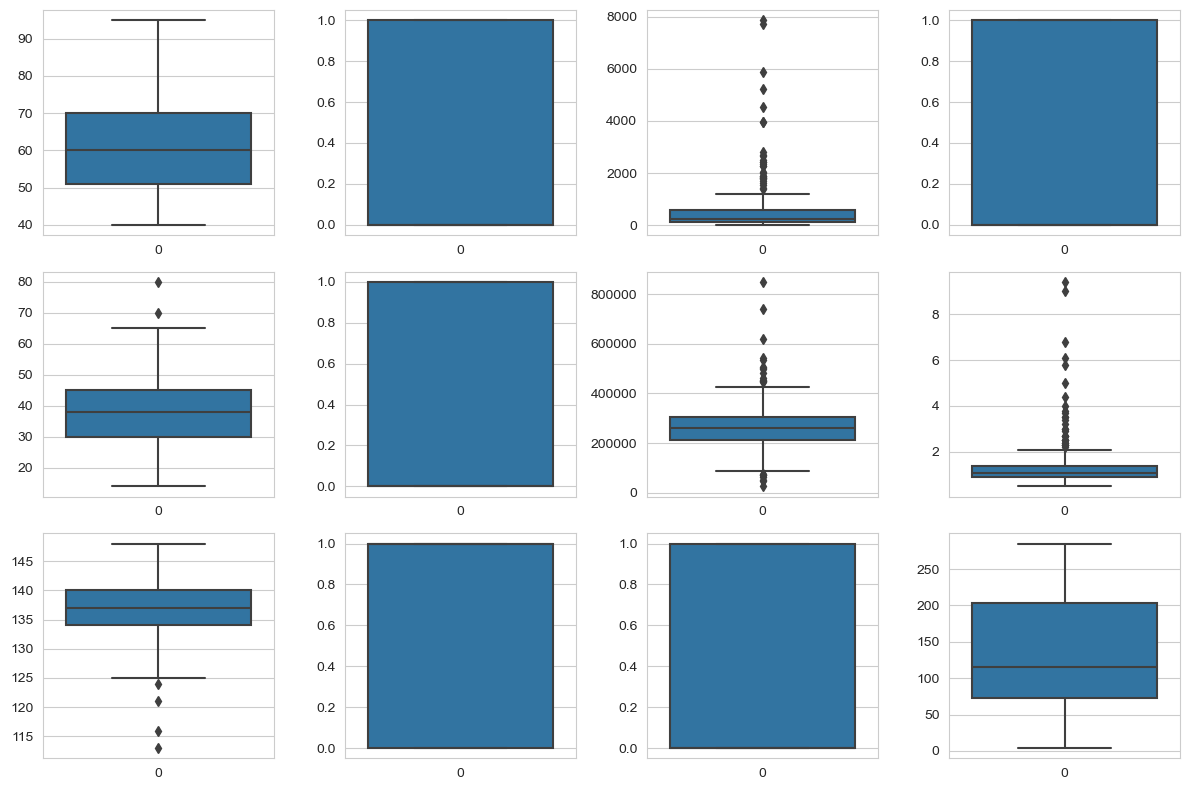

In [9]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(nrows = 3, ncols = 4, figsize=(12,8))
for var, subplot in zip(df.columns, ax.flatten()):
        sns.boxplot(df[var], ax=subplot)
plt.tight_layout()
plt.show()

Diagram *boxplot* ini memberikan pandangan visual tentang distribusi dan statistik deskriptif untuk setiap variabel. Diagram kotak menunjukkan lokasi kuartil (Q1, median, dan Q3), rentang antarkuartil (IQR), serta titik-titik yang dianggap sebagai pencilan (*outliers*).

- Setiap baris dalam grid subplot mewakili satu variabel dalam *dataframe*.
- Setiap diagram kotak menggambarkan distribusi variabel yang bersangkutan.
- Titik-titik di atas atau di bawah diagram kotak menunjukkan adanya pencilan (outliers) potensial.
- Diagram ini memberikan pandangan cepat tentang sebaran nilai, kemiringan distribusi, serta keberadaan pencilan dalam setiap variabel.

Ada 3 solusi yang bisa digunakan untuk meng*handle* *outlier* ini, untuk metode yang digunakan di dataset ini adalah dengan menghapus data *outlier* menggunakan *IQR*.

In [10]:
# Outlier detection with IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
# Create the lower and upper bound
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Make a new var to filter the outliers
mask = (df >= lower_bound) & (df <= upper_bound)

# Use the mask to keep only the rows where all values are within the bounds
df = df[mask.all(axis=1)]

Disini df akan difilter berdasarkan variable 'mask' yang dibuat yaitu menyimpan baris data yang sesuai dengan syarat yang ada di variabel 'mask'.

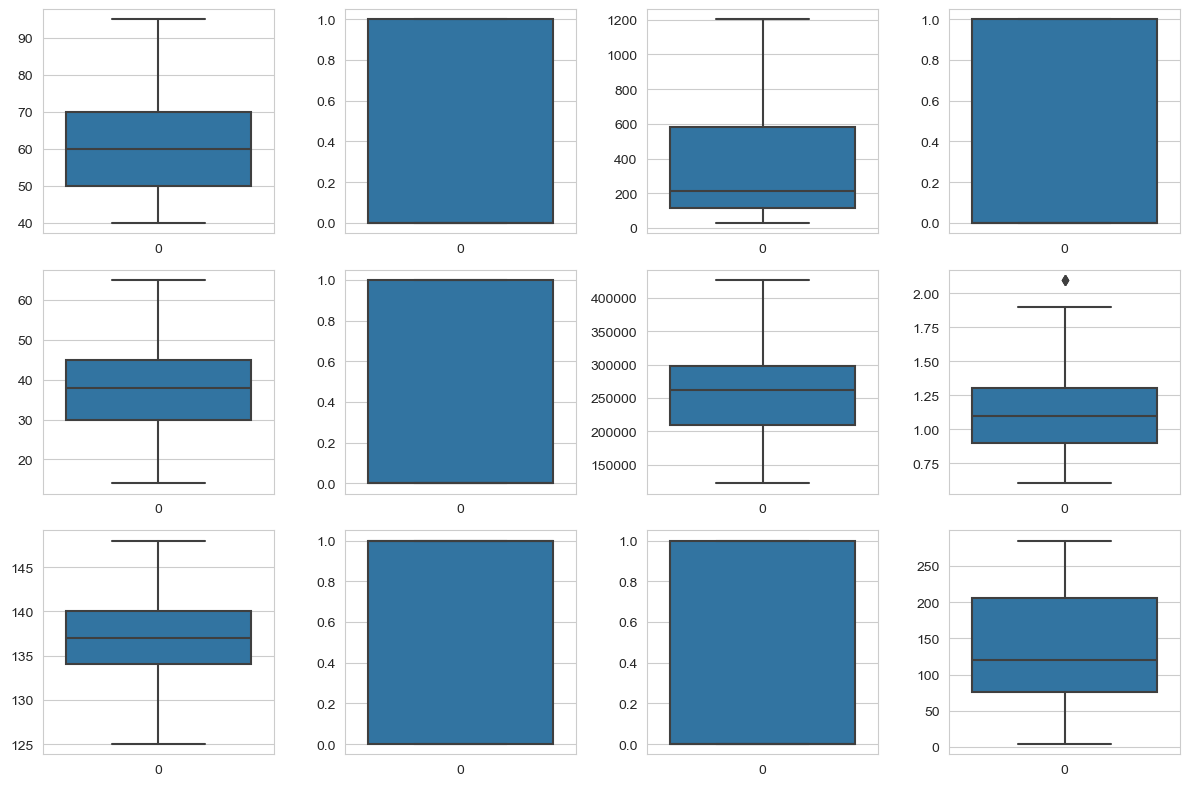

In [11]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(nrows = 3, ncols = 4, figsize=(12,8))
for var, subplot in zip(df.columns, ax.flatten()):
        sns.boxplot(df[var], ax=subplot)
plt.tight_layout()
plt.show()

Setelah data cleaning dilakukan, proses bisa dilanjut dengan *EDA(Explanatory Data Analysis)*.

## e. *Data Exploration*

### e.1 *Measure of Central Tendency*

In [12]:
# Calculate the Central Tendency of each numerical columns
central_tendency = df.describe().T
central_tendency.reset_index().rename(
    columns={'index': 'Attributes'})

,Attributes,count,mean,std,min,25%,50%,75%,max
0,age,224.0,60.809527,11.946085,40.0,50.00,60.0,70.0,95.0
1,anaemia,224.0,0.468750,0.500140,0.0,0.00,0.0,1.0,1.0
2,creatinine_phosphokinase,224.0,336.941964,279.521085,30.0,114.50,212.0,582.0,1202.0
3,diabetes,224.0,0.419643,0.494606,0.0,0.00,0.0,1.0,1.0
4,ejection_fraction,224.0,38.178571,11.710801,14.0,30.00,38.0,45.0,65.0
5,high_blood_pressure,224.0,0.379464,0.486340,0.0,0.00,0.0,1.0,1.0
6,platelets,224.0,255865.190045,67153.749051,122000.0,210000.00,262500.0,297250.0,427000.0
7,serum_creatinine,224.0,1.128571,0.327794,0.6,0.90,1.1,1.3,2.1
8,serum_sodium,224.0,137.044643,3.806740,125.0,134.00,137.0,140.0,148.0
9,sex,224.0,0.642857,0.480231,0.0,0.00,1.0,1.0,1.0


### e.2 *Measure of Variability*

In [13]:
# Create a dataframe that only contains numeric columns
numerical_columns = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']
numeric_df = df[numerical_columns]
numeric_df.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
0,75.0,582,20,265000.0,1.9,130
2,65.0,146,20,162000.0,1.3,129
3,50.0,111,20,210000.0,1.9,137
5,90.0,47,40,204000.0,2.1,132
6,75.0,246,15,127000.0,1.2,137


In [14]:
# Compute some measure of variability
range_values = numeric_df.max() - numeric_df.min()
variance_values = numeric_df.var()
std_deviation_values = numeric_df.std()
iqr_values = numeric_df.quantile(0.75) - numeric_df.quantile(0.25)
cv_values = std_deviation_values / numeric_df.mean()

In [15]:
# Combine the results into one dataframe
variability_measures = pd.DataFrame({
    'Range': range_values,
    'Variance': variance_values,
    'Std Deviation': std_deviation_values,
    'IQR': iqr_values,
    'CV': cv_values
})
variability_measures.head()

,Range,Variance,Std Deviation,IQR,CV
age,55.0,1.427089e+02,11.946085,20.0,0.196451
creatinine_phosphokinase,1172.0,7.813204e+04,279.521085,467.5,0.829582
ejection_fraction,51.0,1.371429e+02,11.710801,15.0,0.306738
platelets,305000.0,4.509626e+09,67153.749051,87250.0,0.262458
serum_creatinine,1.5,1.074491e-01,0.327794,0.4,0.290451


Dalam hasil *command* tersebut, kita telah berhasil menghitung beberapa ukuran variabilitas *(measure of variability)* untuk kolom-kolom numerik pada dataset *"Heart Failure Clinical Data"*. Berikut adalah penjelasan singkat mengenai setiap ukuran variabilitas:
- **Range (Rentang)**: Rentang diukur sebagai selisih antara nilai maksimum dan minimum dalam setiap kolom. Rentang memberikan gambaran tentang sebaran keseluruhan data.
- **Variance (Varians**): Varians mengukur seberapa jauh nilai dalam satu kolom dapat bersifat bervariasi dari rata-rata kolom tersebut. Varians dihitung sebagai rata-rata dari kuadrat deviasi setiap nilai dari rata-rata.
- **Std Deviation (Deviasi Standar)**: Deviasi standar adalah akar kuadrat dari varians. Ini memberikan gambaran tentang seberapa jauh nilai-nilai dalam kolom dapat bersifat bervariasi dari rata-rata.
- **IQR (Interquartile Range)**: IQR diukur sebagai selisih antara kuartil atas (Q3) dan kuartil bawah (Q1). IQR memberikan gambaran tentang sebaran data yang lebih stabil dan kurang terpengaruh oleh nilai-nilai ekstrem.
- **CV (Coefficient of Variation)**: Koefisien variasi dihitung sebagai deviasi standar dibagi oleh rata-rata. Ini memberikan gambaran tentang seberapa besar variabilitas relatif terhadap ukuran rata-rata.
DataFrame yang dihasilkan menunjukkan nilai-nilai ini untuk setiap kolom numerik dalam dataset, memberikan pemahaman yang lebih baik tentang sebaran dan variasi data kesehatan jantung.

### e.3 *Simple Data Plotting*

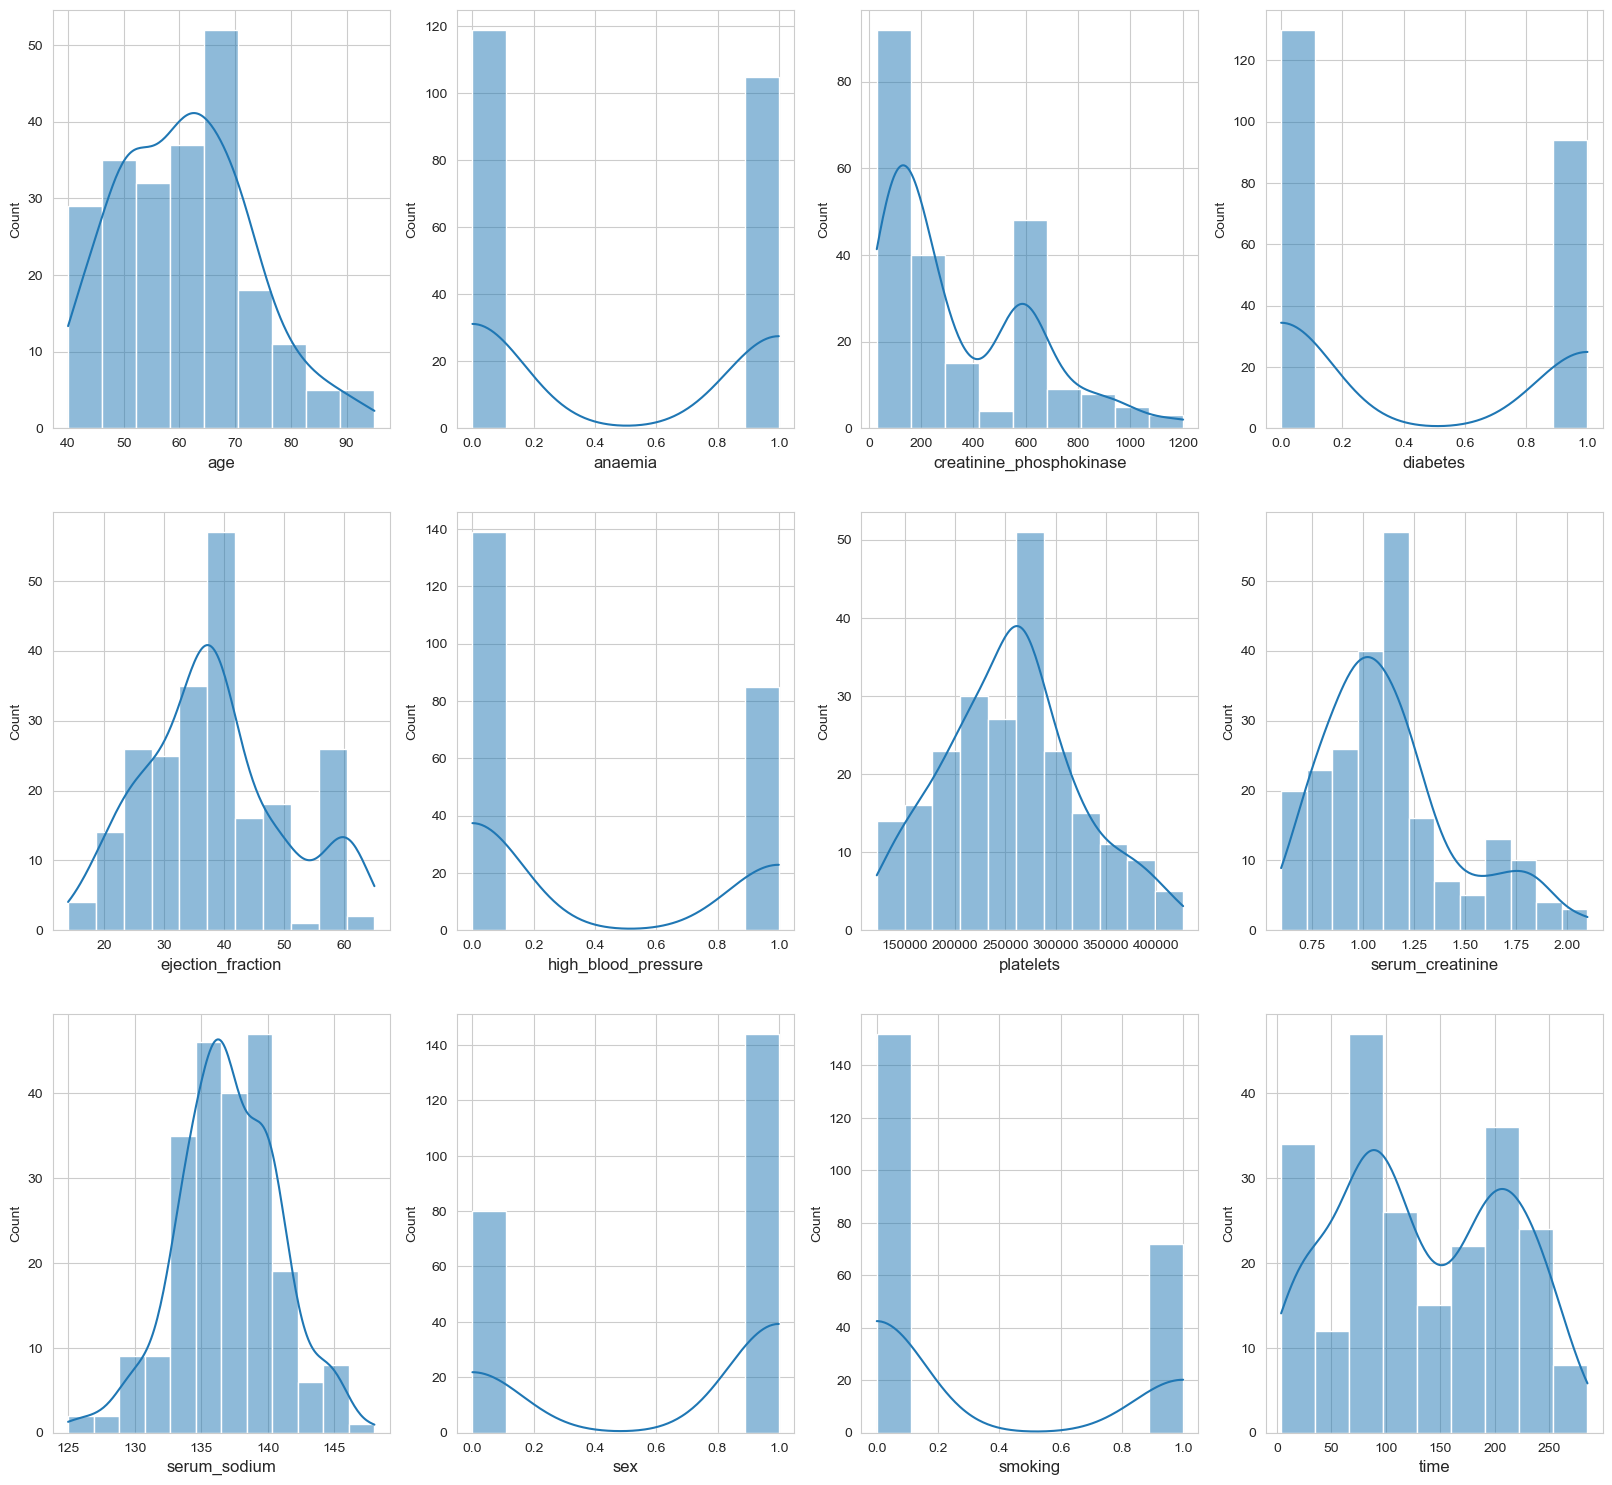

In [16]:
plt.figure(figsize = (20, 25))
feature_num = 1
for i in df:
    if feature_num < 13:
        ax = plt.subplot(4, 4, feature_num)
        sns.histplot(df[i], kde=True)  # Using histplot with KDE (Kernel Density Estimate)
        plt.xlabel(i, fontsize = 12)
        
    feature_num += 1
plt.show()

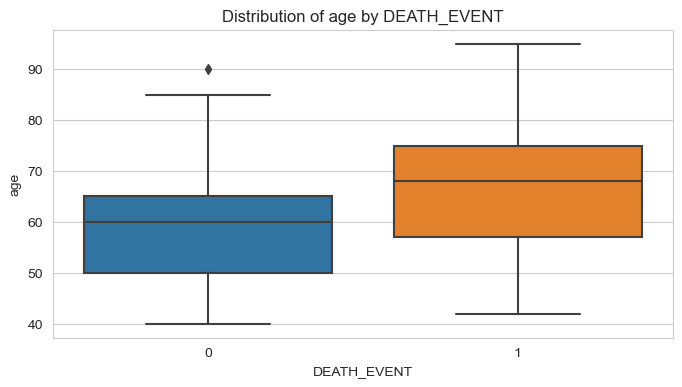

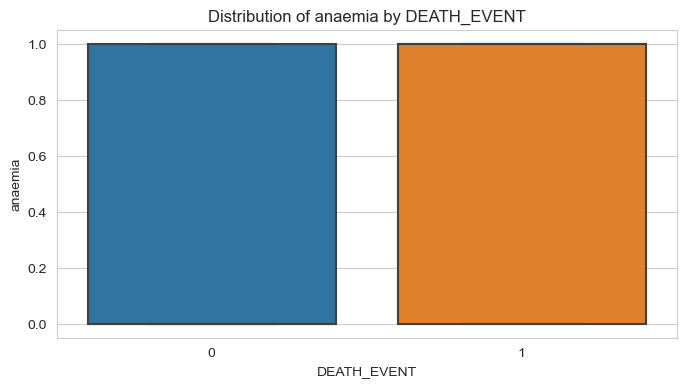

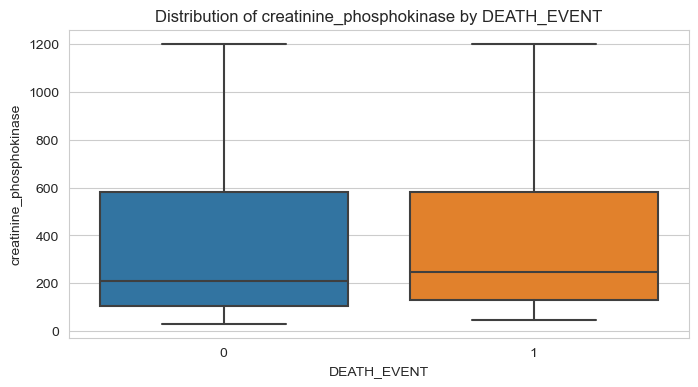

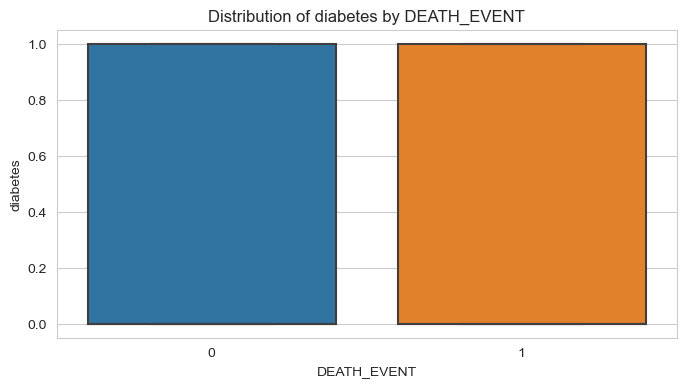

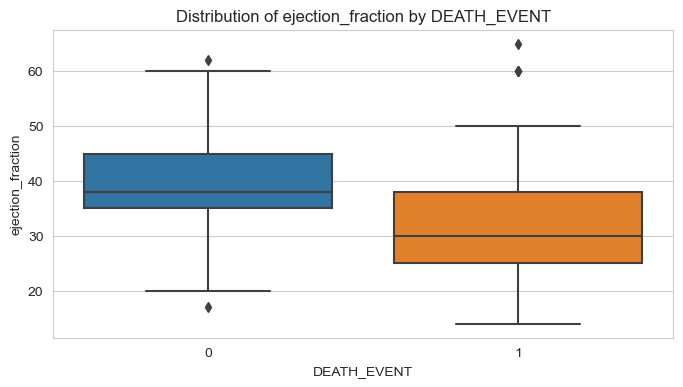

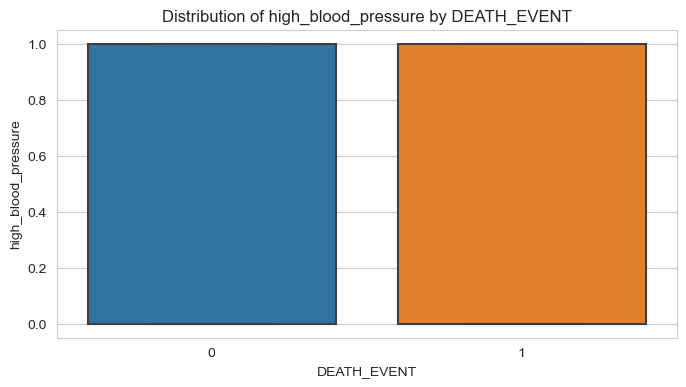

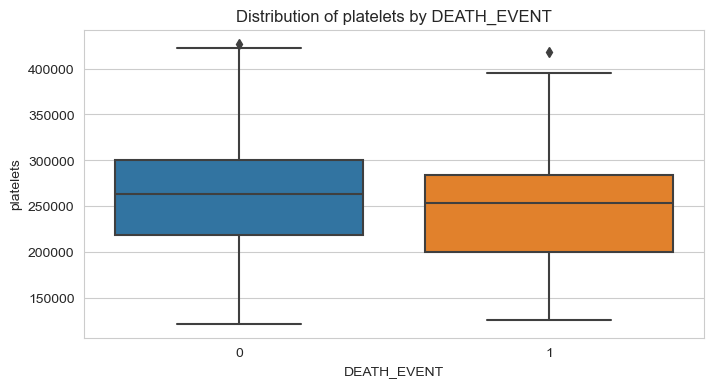

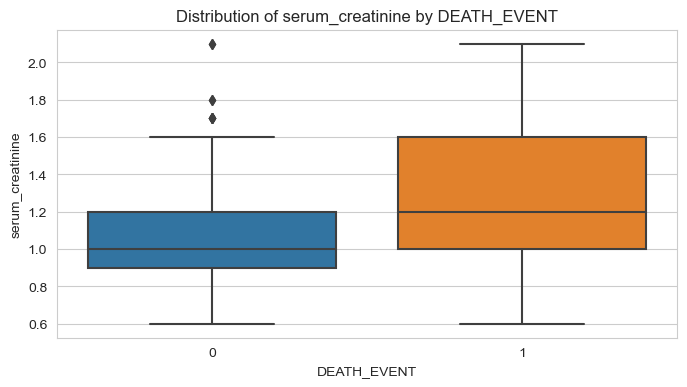

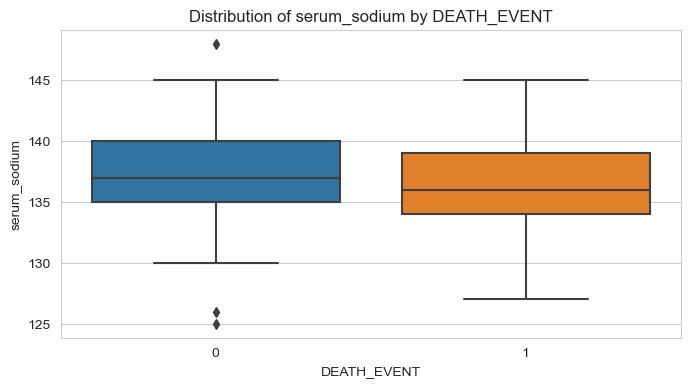

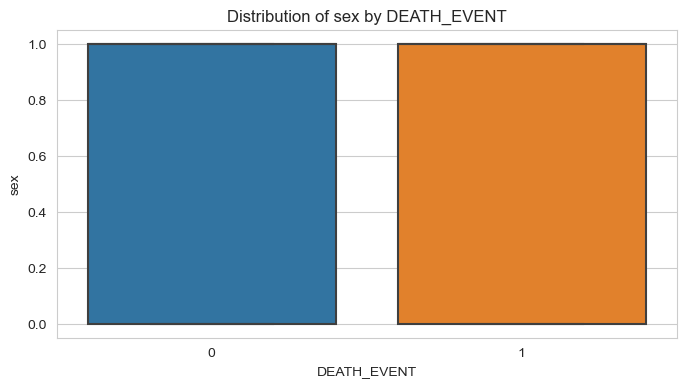

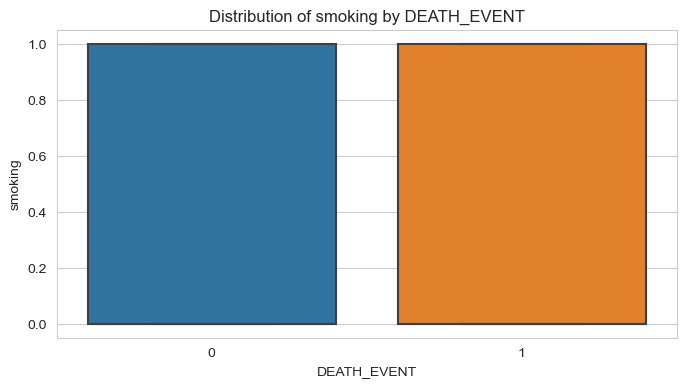

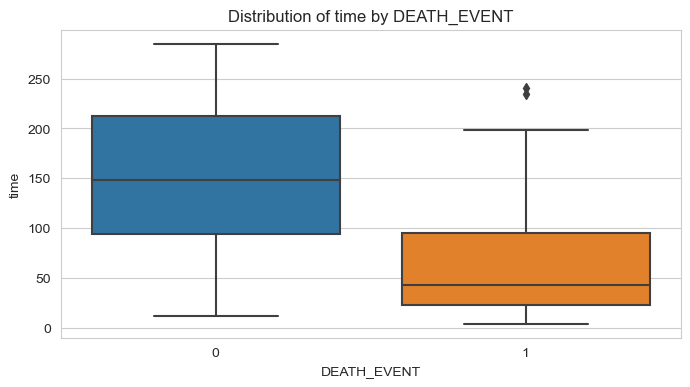

In [17]:
# For each numerical feature from dataset plot with boxplot
for column in df.select_dtypes(include='number').columns:
    if column != 'DEATH_EVENT': 
        plt.figure(figsize=(8, 4))
        sns.boxplot(x='DEATH_EVENT', y=column, data=df)
        plt.title(f'Distribution of {column} by DEATH_EVENT')
        plt.show()


Berikut adalah hasil data visualisasi *boxplot* yang di*group* menggunakan kolom *'DEATH_EVENT'*. Selanjutnya proses akan dilanjut dengan *Data Preprocessing*

## f. *Data Preprocessing*

### f.1 *Correlation Check*

<Axes: >

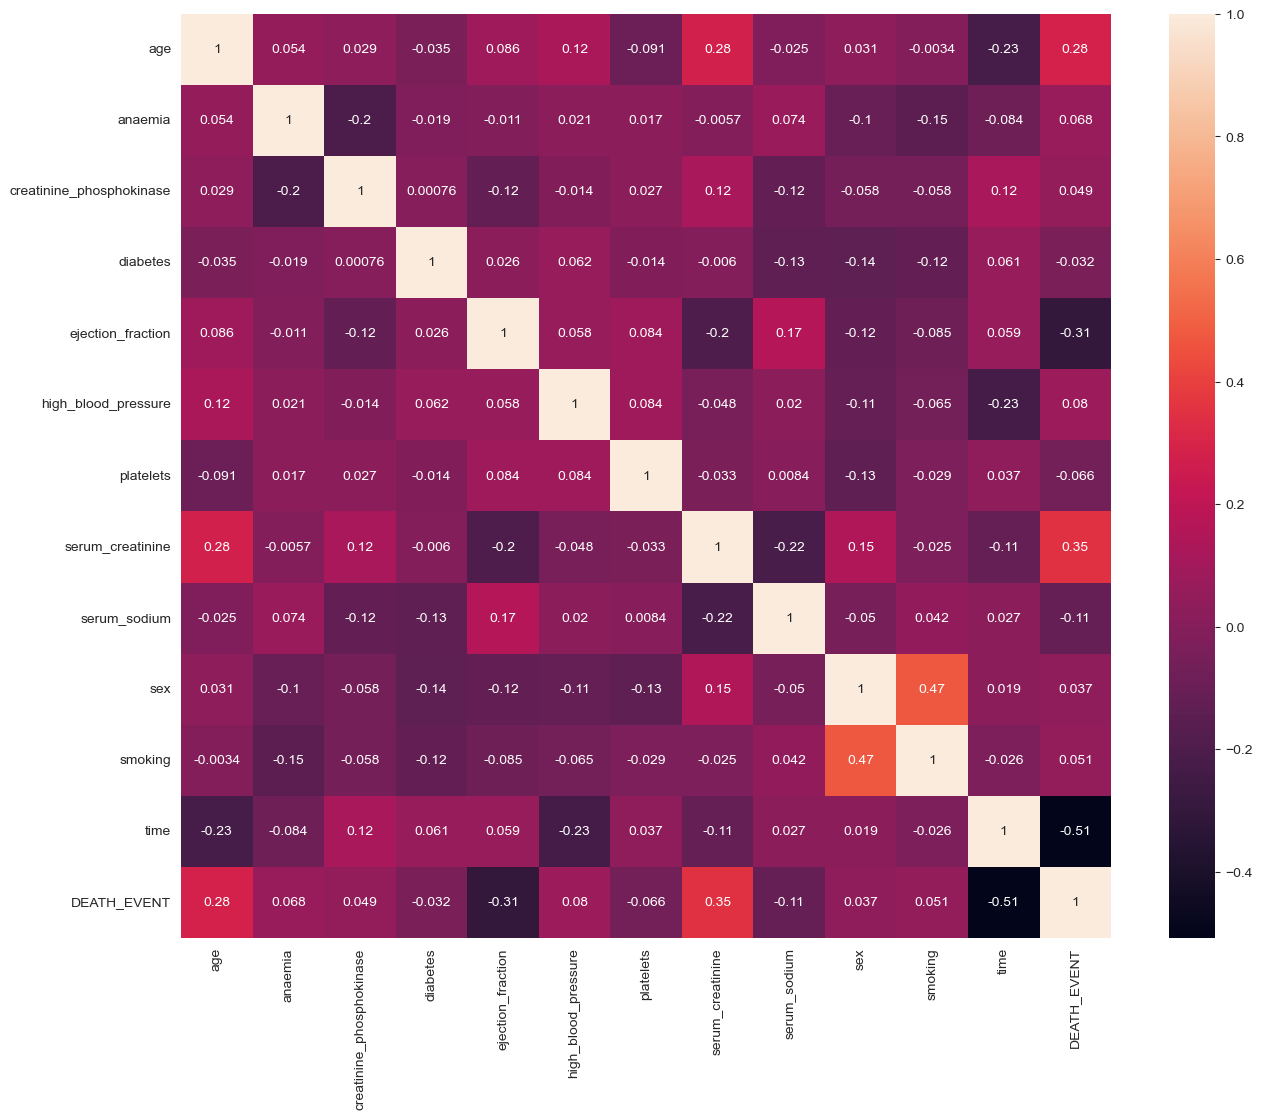

In [18]:
correlation_check = df.corr()
plt.figure(figsize=(15,12))
sns.heatmap(correlation_check, annot=True)

Visualisasi ini menggunakan heatmap untuk menggambarkan matriks korelasi antar variabel pada dataset. Nilai korelasi berkisar dari -1 hingga 1, di mana 1 menunjukkan korelasi sempurna dan -1 menunjukkan korelasi terbalik sempurna. Warna dari setiap sel pada heatmap merepresentasikan kekuatan dan arah korelasi antar dua variabel.
- **Nilai Positif (Warna Lebih Terang)**: Menunjukkan korelasi positif, yaitu saat satu variabel naik, variabel lainnya cenderung naik juga.
- **Nilai Negatif (Warna Lebih Gelap)**: Menunjukkan korelasi negatif, yaitu saat satu variabel naik, variabel lainnya cenderung turun.

Annotasi pada heatmap memberikan informasi nilai korelasi pada setiap sel. Visualisasi ini membantu dalam mengidentifikasi pola dan hubungan antar variabel, memandu pemahaman terhadap struktur data. Semakin dekat nilai korelasi ke -1 atau 1, semakin kuat hubungan antar variabel tersebut.

### f.2 *Data Split Train Test*

Di Proses ini, *data* akan dicheck jumlah *labeled* datanya disertakan dengan pemisahan kolom fitur (X) dan kolom label (y) yang ada. Lalu diakhiri dengan pembagian data train dan test menjadi 80:20

In [19]:
# Split the feature and label columns
X = df.drop('DEATH_EVENT', axis=1)
y = df[('DEATH_EVENT')]

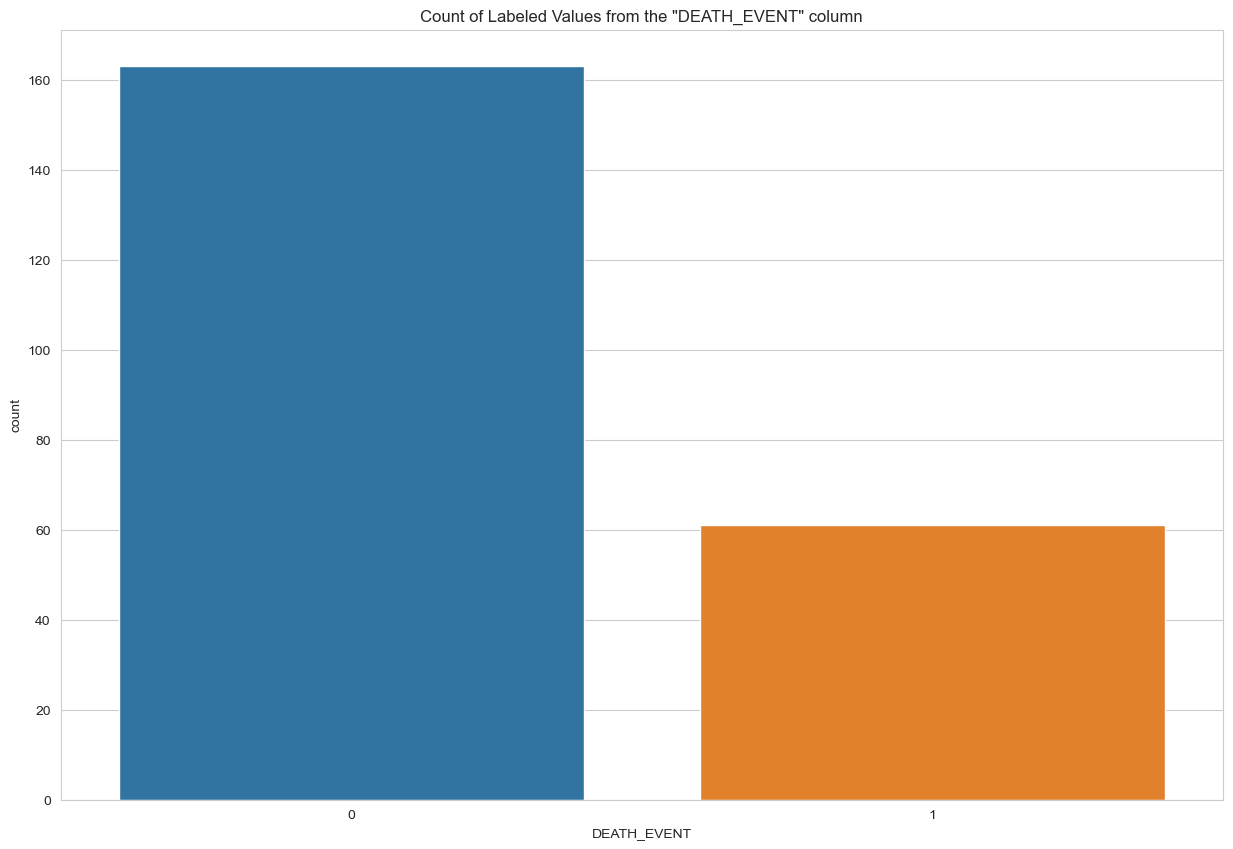

In [20]:
# Plot the labeled data
plt.figure(figsize=(15,10))
sns.countplot(x=df['DEATH_EVENT'])
plt.title('Count of Labeled Values from the "DEATH_EVENT" column')
plt.show()

Dari hasil plot diatas pada kolom *'DEATH_EVENT'* data bisa dinyatakan unbalanced, dimana jumlah data berlabel 0 > data berlabel 1. Solusi yang akan digunakan oleh kelompok 9 disini adalah dengan penggunaan SMOTE untuk oversampling. Diharapkan jumlah *label data* akan seimbang satu sama lain di proses akhirnya lalu diakhiri dengan *split* *train* dan *test*.

In [21]:
X, y = SMOTE().fit_resample(X, y)

In [22]:
y.value_counts()

1    163
0    163
Name: DEATH_EVENT, dtype: int64

Disini jumlah data sudah *balanced*, proses akan dilanjut dengan *split data train test.*

In [23]:
# Split the train test data into 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### f.3 *Standarization*

Disini data akan distandarisasi menggunakan *StandardScaler*. *StandardScaler* akan melakukan standarisasi fitur dengan menghapus rata-rata dan menskalakannya ke unit varian.

In [24]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [25]:
# Calculate each row and columns are there
print('X_train (row, column)', X_train.shape)
print('X_test (row, column)', X_test.shape)
print('y_train (row, column)', y_train.shape)
print('y_test (row, column)', y_test.shape)

X_train (row, column) (260, 12)
X_test (row, column) (66, 12)
y_train (row, column) (260,)
y_test (row, column) (66,)


Kode diatas digunakan untuk mengecek distribusi pembagian *data train* dan *data test*. Hasil yang didapatkan berupa **260** baris dan **11** kolom(fitur) pada *data train* dan **66** baris pada *data test*

## g. *Define the model*

Metode algoritma yang digunakan pada *final project* ini adalah *Random Forest* & Boosting. *Random Forest* & Boosting adalah algoritma *Ensemble* pada *machine learning* yang membutuhkan *label* untuk melakukan klasifikasi.  
Ada 3 skenario yang akan dilakukan oleh Kelompok 9 dalam dataset ini, yaitu :
1. *Random Forest Classifier tanpa additional parameter*
2. *Random Forest Classifier dengan additional parameter*
3. *Boosting dengan AdaBoost Classifier*  
Disini, ketiga *model* akan dibandingkan akurasinya untuk mengetahui model mana yang jauh lebih unggul dalam melakukan klasifikasi *dataset heart failure*. Lalu akan disimpulkan dari hasil akurasi yang didapat.

In [26]:
# Define the Model
rf = RandomForestClassifier(random_state=42)
ada = AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

## h. *Train & Evaluate the Model*

### h.1 Random Forest without additional parameter

Disini *model rf(RandomForest)* akan dilatih dengan menggunakan parameter yang sudah di*defined* sebelumnya yaitu *random_state* untuk menghasilkan akurasi yang stabil. Hasil akurasi yang akan dicari adalah akurasi *data train* dan *data test* yang sudah di*defined*.

In [27]:
# Train the model
rf.fit(X_train, y_train)

# Predict the training set
y_train_pred = rf.predict(X_train)

# Predict the test set
y_test_pred = rf.predict(X_test)

# Evaluate the model accuracy on training data
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Train Data Accuracy:", train_accuracy)

# Evaluate the model accuracy on test data
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Data Accuracy:", test_accuracy)

#  classification report on test data
print("\nClassification Report (Test Data):")
print(classification_report(y_test, y_test_pred))

Train Data Accuracy: 1.0
Test Data Accuracy: 0.8484848484848485

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        35
           1       0.84      0.84      0.84        31

    accuracy                           0.85        66
   macro avg       0.85      0.85      0.85        66
weighted avg       0.85      0.85      0.85        66



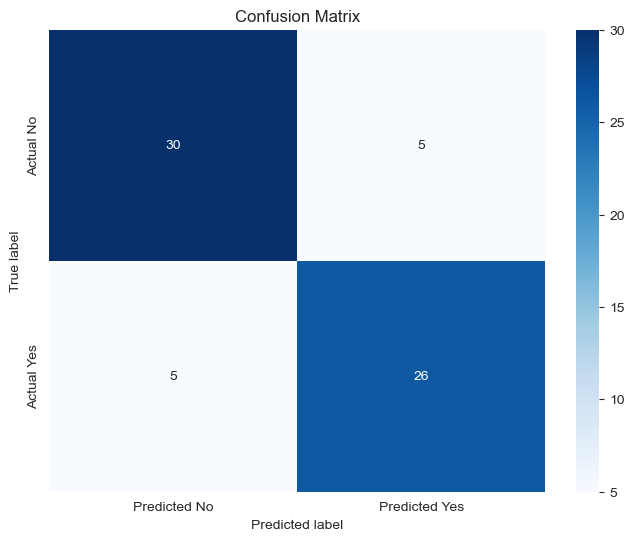

In [28]:
cm = confusion_matrix(y_test, y_test_pred)

# Visualizing the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### h.2 *Random Forest with Additional Parameter* 

Di tahap ini, kelompok 9 akan mencoba berbagai *parameter* yang biasa digunakan untuk *RandomForest Classifier* untuk meilhat bagaimana peforma yahg dihasilkan jika dibandingkan dengan *model* tanpa *parameter* sebelumnya. Hasil yang diharapkan juga sama yaitu akurasi dari *data train* dan *data test*.

In [29]:
# Define your parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['log2', 'sqrt', None],
    'criterion': ['gini', 'entropy']
}

# Initialize the grid search model
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)


Fitting 3 folds for each of 486 candidates, totalling 1458 fits


Best Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 100}


Hasil pecarian parameter terbaik itu akan digunakan untuk model yang baru.

In [30]:
# Get the best parameters from the grid search
best_params = grid_search.best_params_

# Redefine the RandomForestClassifier with the best parameters
best_rf = RandomForestClassifier(**best_params, random_state=42)
best_rf.fit(X_train, y_train)

# Predict on the training set
y_train_pred = best_rf.predict(X_train)

# Predict on the test set
y_test_pred = best_rf.predict(X_test)

# Evaluate the model accuracy on training data
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Train Data Accuracy:", train_accuracy)

# Evaluate the model accuracy on test data
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Data Accuracy:", test_accuracy)

# Classification report on test data
print("\nClassification Report (Test Data):")
print(classification_report(y_test, y_test_pred))

Train Data Accuracy: 0.9730769230769231
Test Data Accuracy: 0.8181818181818182

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        35
           1       0.81      0.81      0.81        31

    accuracy                           0.82        66
   macro avg       0.82      0.82      0.82        66
weighted avg       0.82      0.82      0.82        66



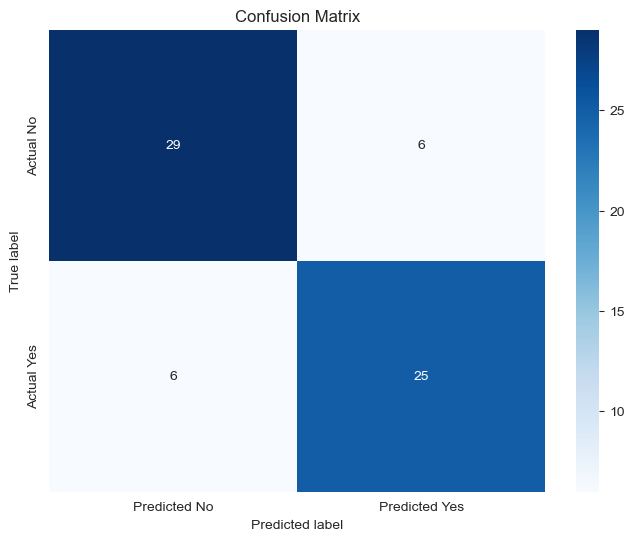

In [31]:
cm = confusion_matrix(y_test, y_test_pred)

# Visualizing the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### h.3 *Comparing Model with Boosting*

In [32]:
# Train the model
ada.fit(X_train, y_train)

# Predict the training set
y_train_pred = ada.predict(X_train)

# Predict the test set
y_test_pred = ada.predict(X_test)

# Evaluate the model accuracy on training data
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Train Data Accuracy:", train_accuracy)

# Evaluate the model accuracy on test data
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Data Accuracy:", test_accuracy)

#  classification report on test data
print("\nClassification Report (Test Data):")
print(classification_report(y_test, y_test_pred))

Train Data Accuracy: 0.9307692307692308
Test Data Accuracy: 0.8636363636363636

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.88      0.86      0.87        35
           1       0.84      0.87      0.86        31

    accuracy                           0.86        66
   macro avg       0.86      0.86      0.86        66
weighted avg       0.86      0.86      0.86        66



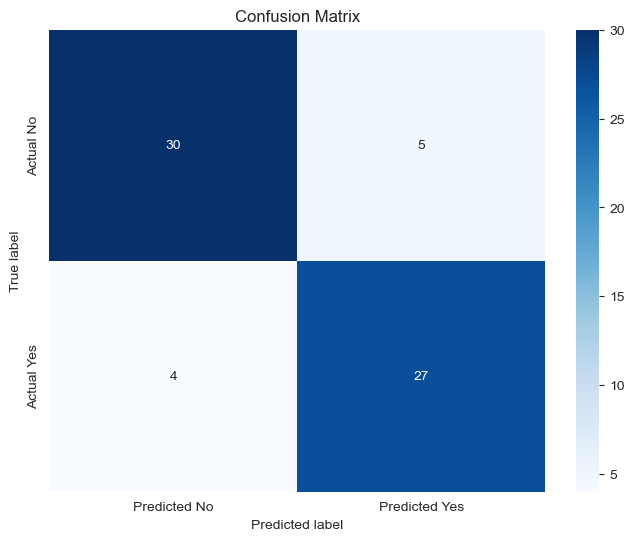

In [33]:
cm = confusion_matrix(y_test, y_test_pred)

# Visualizing the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Plot tersebut merupakan *confusion matrix* dari model *Random Forest* dan *AdaBoosting*. *Confusion matrix* adalah tabel yang digunakan untuk menggambarkan kinerja model klasifikasi pada suatu set data uji di mana nilai sebenarnya diketahui.Interpretasi plot ini adalah sebagai berikut:   

1. True Positive (TP) : Ini adalah jumlah kasus di mana model dengan benar memprediksi bahwa hujan akan terjadi besok
2. True Negative (TN) : Ini adalah jumlah kasus di mana model dengan benar memprediksi bahwa besok tidak akan ada hujan
3. False Positive (FP) : Ini adalah jumlah kasus di mana model salah memprediksi bahwa hujan akan terjadi besok.
4. False Negative (FN) : Ini adalah jumlah kasus di mana model salah memprediksi bahwa besok tidak akan ada hujan yang sebenarnya hujan terjadi     

Dengan memeriksa *confusion matrix*, dapat dievaluasi kinerja kedua model *machine learning* dalam hal kemampuannya untuk mengklasifikasikan instan dengan benar dan mengidentifikasi area di mana kesalahan klasifikasi terjadi. Tujuannya adalah memiliki nilai tinggi di diagonal (mengindikasikan prediksi yang benar) dan nilai rendah di luar diagonal.

## i. *Model Inference*

In [44]:
X_test = pd.DataFrame(X_test)
inference_data = X_test.sample(10)

In [45]:
rf_inference =  rf.predict(inference_data)
best_rf_inference = best_rf.predict(inference_data)
ada_inference =  ada.predict(inference_data)

In [46]:
rf_inference

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 0], dtype=int64)

In [47]:
best_rf_inference

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 0], dtype=int64)

In [48]:
ada_inference

array([0, 1, 1, 1, 1, 0, 1, 1, 0, 0], dtype=int64)

In [50]:
X.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time'],
      dtype='object')

## j. *Conclusion*


Adapun hal-hal yang dbisa disimpulkan dari *final project 3* mengenai Ensemble menggunakan **Random Forest & Ada Boost Classifier** ini yaitu :  
- Melalui klasifikasi yang dilakukan, yang terdiri dari total **299** baris data dengan atribut sebanyak **13** yang bisa digunakan untuk memprediksi, Atribut akhir yang digunakan adalah:  
   X = 'age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time'    
   y = 'DEATH_EVENT'  
- Ada **2** algoritma *machine learning* yang digunakan dengan **3** skenario yaitu *Random Forest (Base parameter & Best Parameter)* dan *Ada Boost*. Hasil evaluasi yang didapatkan digambarkan dalam bentuk metrik akurasi dan confusion matrix. Hasil akurasi yang didapatkan bervariasi dimana akurasi sebesar 0.84 didapatkan pada *Random Forest (Base Parameter)* dan 0.81 didaptkan pada *Random Forest (Best parameter)*, dan 0,86 pada *ADABoost*.
- Kelompok 9 berhasil dalam memahami serta mengimplementasi tahap-tahap yang dilakukan untuk melakukan prediksi gagal jantung menggunakan 2 algoritma *machine learnig*. 

**Dari kesimpulan diatas**, model yang paling cocok untuk digunakan adalah **Ada Boost**. Alasan kami memilih algoritma ini dikarenakan dengan hasil yang dicapai, *model* *Ada Boost* memiliki akurasi y_test yang lebih baik dibandingkan dengan kedua model lainya.

## k. *Save the Model to Pickle*


In [34]:
# Save to Pickle
# Save Base Random Forest Model to Pickle
# with open('base_randomforest_model.pkl', 'wb') as file:
#    pickle.dump(rf, file)

In [35]:
# Save to Pickle
# Save Best Feature Random Forest Model to Pickle
# with open('best_randomforest_model.pkl', 'wb') as file:
#    pickle.dump(best_rf, file)

In [49]:
# Save to Pickle
# Save Best Feature Random Forest Model to Pickle
# with open('ada_boost_model.pkl', 'wb') as file:
#   pickle.dump(ada, file)